In [ ]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
import matplotlib.pyplot as plt

# STEP 2: Load the dataset
columns = [
    "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8",
    "A9", "A10", "A11", "A12", "A13", "A14", "A15", "class"
]

df = pd.read_csv("C:\\Users\\RESHM\\Downloads\\credit+approval\\crx.data", header=None, names=columns, na_values="?")


In [9]:
df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [10]:
df.shape

(690, 16)

In [13]:
df.isnull()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.describe()
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'class'],
      dtype='object')

Accuracy: 0.8396946564885496

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        76
           1       0.80      0.82      0.81        55

    accuracy                           0.84       131
   macro avg       0.84      0.84      0.84       131
weighted avg       0.84      0.84      0.84       131



<Figure size 640x480 with 0 Axes>

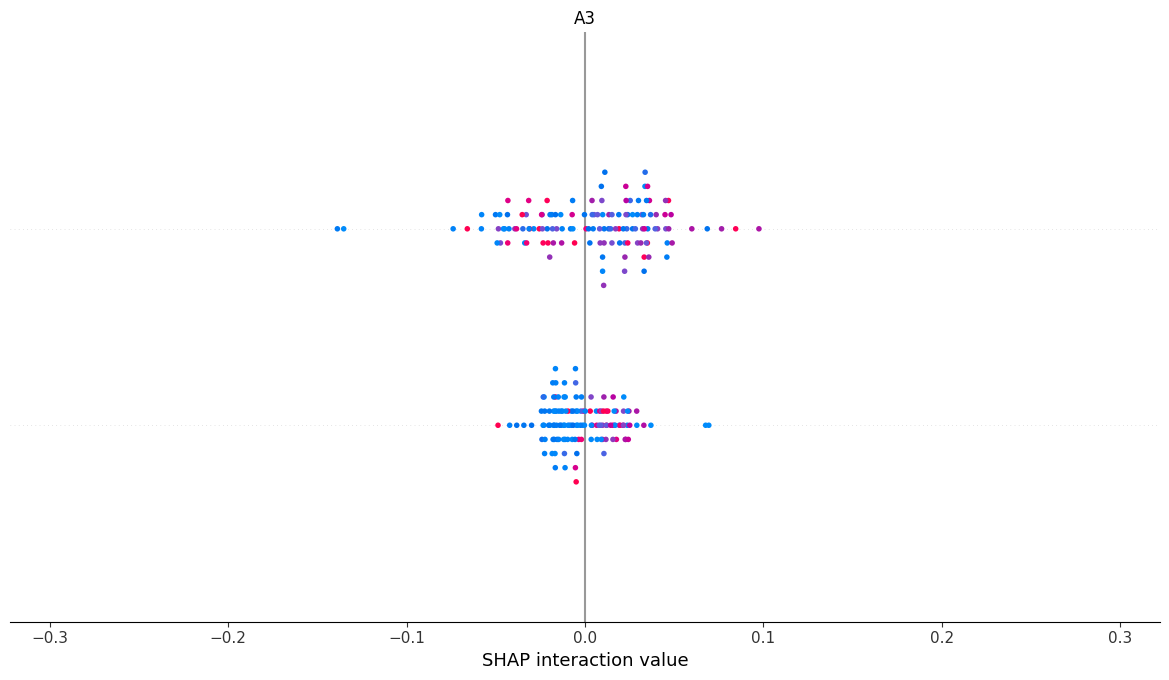

In [16]:
# STEP 3: Basic cleaning
df.dropna(inplace=True)
df['class'] = df['class'].map({'+': 1, '-': 0})

# STEP 4: Add alternative features
df['mobile_usage_gb'] = np.random.uniform(0.5, 20.0, size=len(df)).round(2)
df['upi_transaction_count'] = np.random.randint(0, 100, size=len(df))
df['electricity_bill_amount'] = np.random.randint(200, 3000, size=len(df))

# STEP 5: Encode categorical features
X = pd.get_dummies(df.drop("class", axis=1), drop_first=True)
y = df["class"]

# STEP 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 8: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# STEP 9: Explain with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# STEP 10: Plot SHAP summary safely
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test)

# STEP 11: (Optional) Save cleaned dataset
df.to_csv("credit_data_clean.csv", index=False)